In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data set from locally saved
df = pd.read_csv("SampleSuperstore.csv")
print("Data import successfuly")

Data import successfuly


In [3]:
# see the first 5 records in the data set
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# check the shape of given data
df.shape

(9994, 13)

In [6]:
# Describing the stats
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# check the duplicate records
duplicate_rows = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (17, 13)


In [9]:
# drop the duplicate records
data = df.drop_duplicates().reset_index(drop=True)
data.tail()  # see last 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9972,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9973,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9974,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9975,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9976,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
# check unique values in our columns
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
data = data.drop(columns={'Country','Postal Code'},axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
category_sales_profit = data.groupby('Category').sum()
display(category_sales_profit)

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741306.3133,8020,368.59,18421.8137
Office Supplies,718735.2440,22861,946.20,122364.6608
Technology,836154.0330,6939,244.40,145454.9481


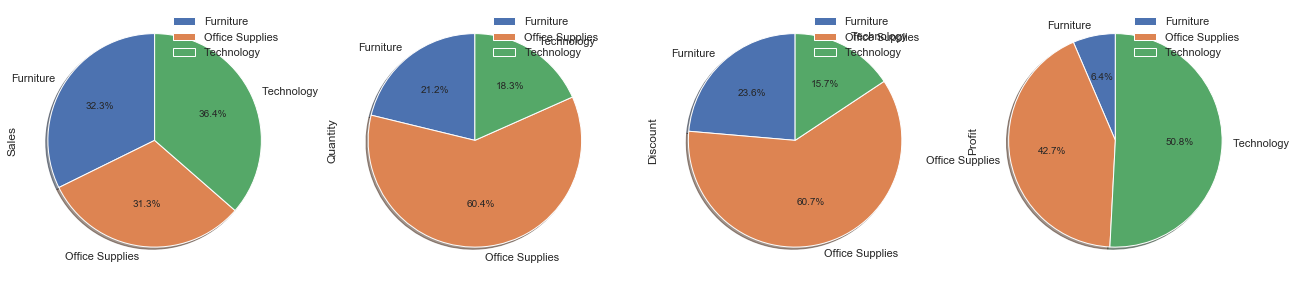

In [15]:
#Sales, Quantity, Discount and Profit of Categories
plt.style.use('seaborn-darkgrid')
category_sales_profit.plot.pie(shadow = True,startangle=90,subplots=True,figsize=(22, 10), autopct='%1.1f%%')
plt.show()

In [16]:
Subcategory_sales_profit = data.groupby('Sub-Category').sum()
display(Subcategory_sales_profit)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27107.0320,2996,59.60,6524.6118
Binders,203409.1690,5971,566.20,30228.0003
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,327777.7610,2351,104.70,26567.1278
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


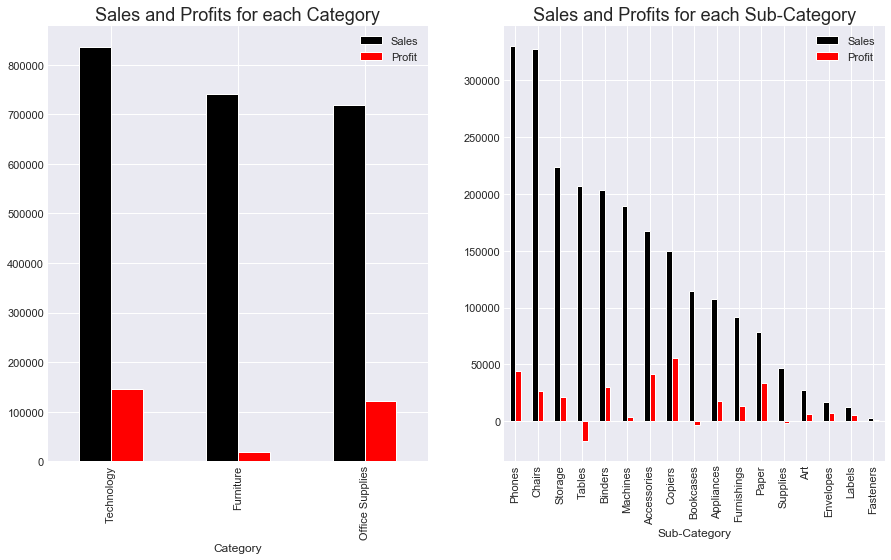

In [23]:
#Sales and Profits of Categories and Sub-Categories
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",color=["black","red"],ax=ax1)
ax1.set_title("Sales and Profits for each Category",size=18)
data.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by ="Sales",ascending=False).plot(kind ="bar",color=["black","red"],ax=ax2)
ax2.set_title("Sales and Profits for each Sub-Category",size=18)
plt.show()

From plot 1 : The maximum profit is for category Technology with sales around 836K and the minimum Profit is for category Furniture with sales around 741K 
From plot 2 : The maximum profit is for subcategory Copies with sales nearly 150K and the profit is negative for sub category Tables with sales nearly 206K

In [18]:
Quantity_sales_profit = data.groupby('Quantity').sum()
display(Quantity_sales_profit)

,Sales,Discount,Profit
Quantity,,,
1,53251.9345,137.51,7440.4801
2,288786.7798,371.47,38450.6180
3,421514.1507,367.97,56928.7335
4,323516.8744,187.83,44152.3740
5,415661.6965,193.29,49516.5945
6,207122.3214,95.27,10325.4678
7,239908.3659,98.16,34286.9730
8,117760.1760,44.10,10856.7960
9,128505.5901,38.17,17687.8908


In [19]:
Segment_sales_profit=data.groupby('Segment').sum()
display(Segment_sales_profit)

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.160833e+06,19497,820.51,134007.4413
Corporate,7.060701e+05,11591,476.85,91954.9798
Home Office,4.292927e+05,6732,261.83,60279.0015


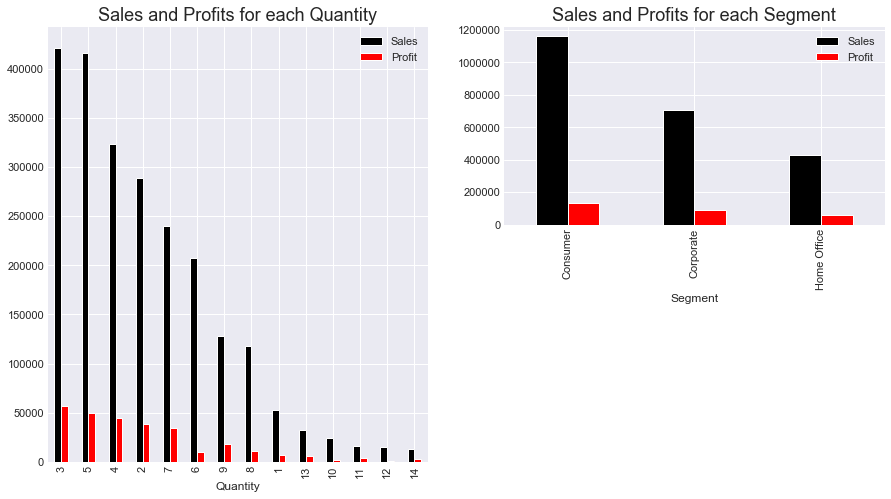

In [24]:
#Sales and Profits of each Quantity and each Segment
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(222)
data.groupby("Quantity")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax1)
ax1.set_title("Sales and Profits for each Quantity",size=18)
data.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax2)
ax2.set_title("Sales and Profits for each Segment",size=18)
plt.show()

From plot 1 : The sales is maximum for lesser quantities and so is the profit. 


From plot 2 : The maximum profit is for Segment consumer for maximum sales and the profit is minimum for segment Home office with minimum sales amongst the segment.



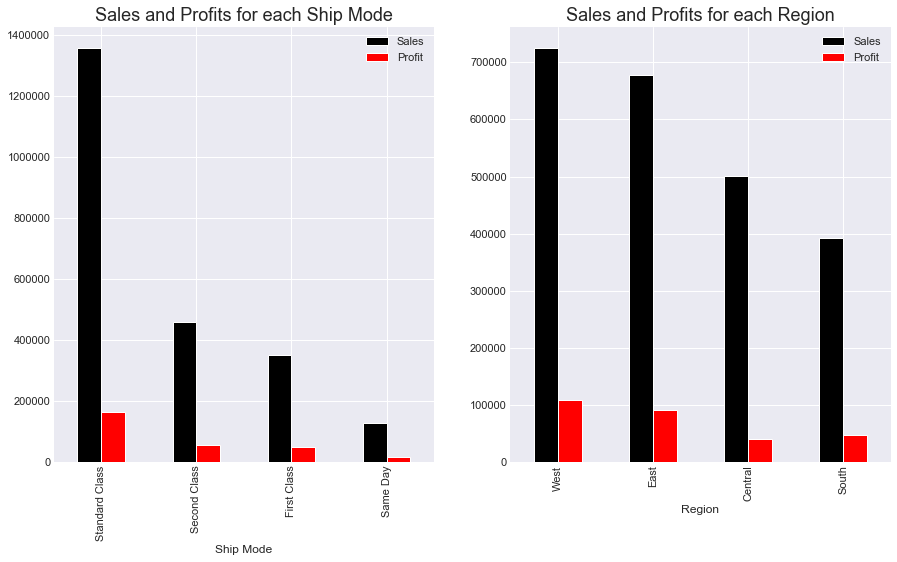

In [25]:
#Sales and Profits of each Ship Mode and each Region
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
data.groupby("Ship Mode")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax1)
ax1.set_title("Sales and Profits for each Ship Mode",size=18)
data.groupby("Region")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "red"],ax=ax2)
ax2.set_title("Sales and Profits for each Region",size=18)
plt.show()

From plot 1 : The maximum sales is using the standard class Ship mode giving maximum profits. 

From plot 2 : The maximum sales is more than 700K for the West region and Profit is maximum in this region. The minimum profit is present in the Cdentral region where sales is comparatively higher than the south region that has more profit that the central region

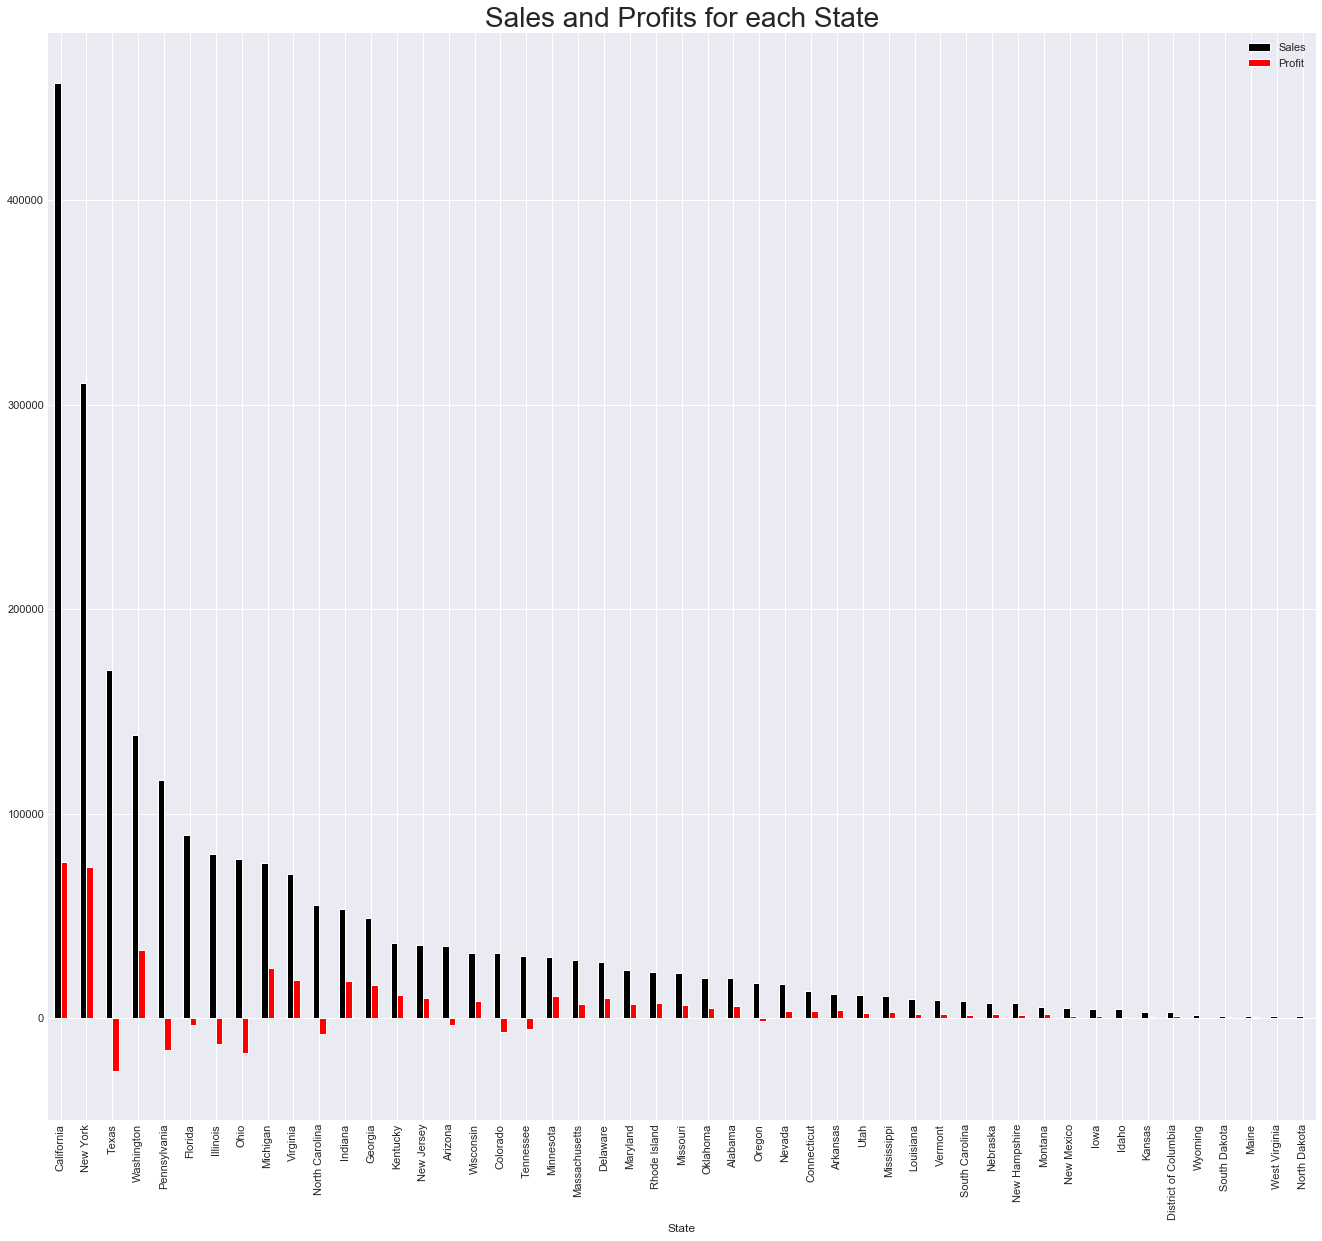

In [26]:
#Sales and Profits of each State
fig=plt.figure(figsize=(50,20))
ax1=fig.add_subplot(121)
data.groupby("State")[["Sales","Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black","red"],ax=ax1)
ax1.set_title("Sales and Profits for each State", size=28)
plt.show()

From above : for states including Texas,Pennsylvania, Florida, Illinois, Ohio, North Carolina and few other states have high sales with negative profits.

In [29]:
#statewise discount
data.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

In [30]:
# data frame of statewise sales,profit,discount
states_data = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_data.head()

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70


In [31]:
#Discount with Negative Profit
states_data['Discount'][states_data['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

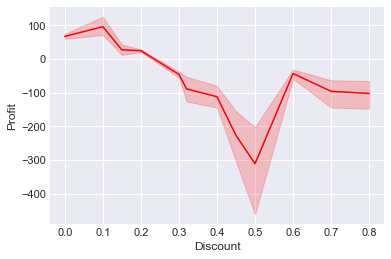

In [32]:
#line plot
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "red")
plt.show()

From above : We can clearly observe that the discount has a negative relation with Profit i.e. as the discount is increasing the Profit generated is decreased.

In [33]:
# Categorywise sales and profit and their counts
cat_data = data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by = "Sales",ascending = False)
cat_data['value_counts'] = data['Category'].value_counts()
display(cat_data)

,Sales,Profit,value_counts
Category,,,
Technology,836154.0330,145454.9481,1847
Furniture,741306.3133,18421.8137,2118
Office Supplies,718735.2440,122364.6608,6012


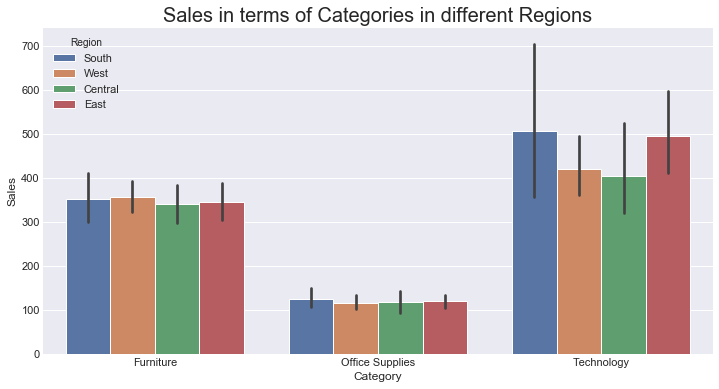

In [34]:
#Sales in terms of Categories in different Regions
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',hue='Region',data=data)
plt.title("Sales in terms of Categories in different Regions",size=20)
plt.show()

From Above : -The sales of "Furniture" is done maximum in Western Region nearly about 360k+, -after that, the sales of "Office Supplies" is maximum done in South region nearly about 150k+ -and the sales of "Technology" is maximum done in South Region nearly about 550k+. -Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in South region.

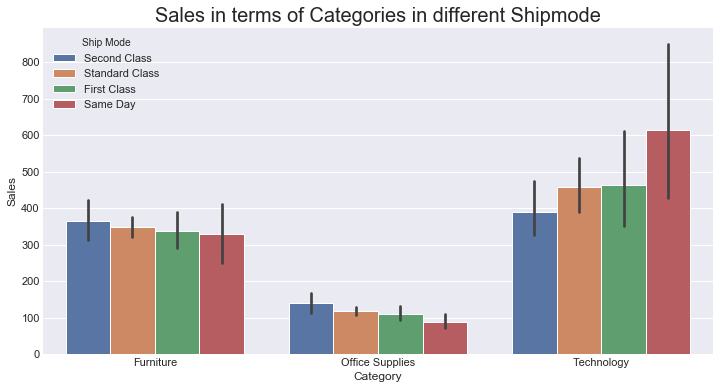

In [36]:
#Sales in terms of Categories in different Shipmode
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',hue='Ship Mode',data=data)
plt.title("Sales in terms of Categories in different Shipmode",size=20)
plt.show()

From Above : -The sales of "Furniture" is done maximum in Second Class, -after that, the sales of "Office Supplies" is maximum done in Second Class -and the sales of "Technology" is maximum done in Same Day. -Among all the three Category, the sale of Technology is Max and also Maximum Sales is done in Same Day.

Observation :-

From the above visual representation, We can see the states and the category where sales and profits are high or less. We can improve in those states by providing discounts in appropriate range so that the company and customers will both get profit. While the superstore is incurring losses by providing discounts on their products, they can't stop doing so. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are required so that the store can make space in their warehouses for new and fresh stock. Also, by incurring small losses, the company achieves consumers in the future by attracting more long term plans. Therefore, the small losses from discounts are an essential part of company's businesses.

Conclusion

I have successfully analyzed & explored the data of SamplesuperStore and I have provided several possible solution on which company can work and improve their results.

